*Physics Department*, University of Hamburg

# Superconductors: A Machine Learning Approach
Computer applications in physics: AI in physics

*Winter 2023/24*

**Devesh Vaish**

**Muharrem Kilinc**

**Mitulbhai Nandlal Akbari**

Instructor: Prof. Dr. Gregor Kasieczka

February 2024

In [1]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_squared_error
import matplotlib.pyplot as plt
import base64
import pandas as pd
from IPython.display import HTML
import seaborn as sns

Mean Squared Error: 133.1238391446659


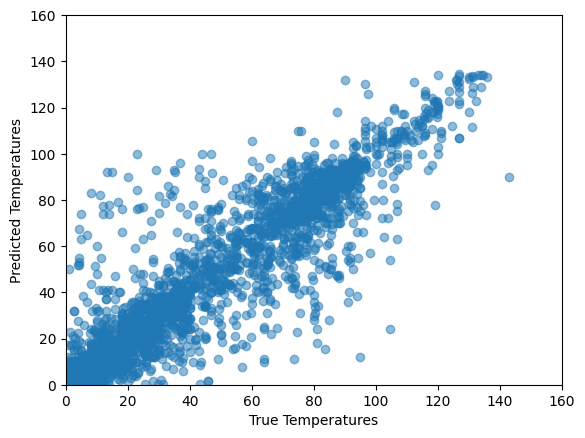

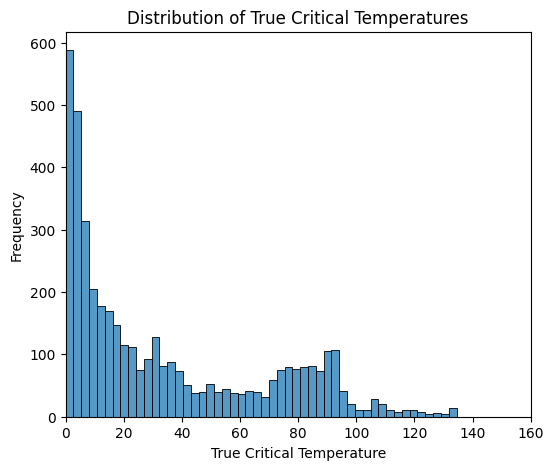

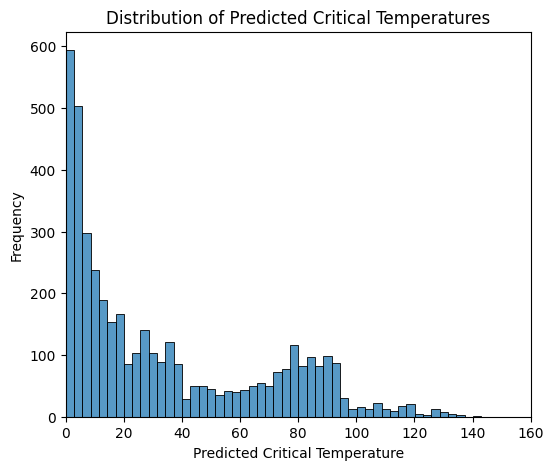

In [2]:
# Load the data
data1 = pd.read_csv('unique_m.csv')
data2 = pd.read_csv('train.csv')

###This is when we use both the feature###

# features1 = data1.iloc[:, :-2].values
# features2 = data2.iloc[:, :-1].values

# features = np.concatenate((features1 , features2) , axis = 1)

######################################################

###This is when we use feature1###

# features1 = data1.iloc[:, :-2].values
# features = features1

########################################################

###This is when we use feature2###

features2 = data2.iloc[:, :-1].values
features = features2

########################################################

# Extract features and critical temperature
criticalTemp = data1.iloc[:, -2].values

# Convert to numpy arrays
X = np.array(features)
y = np.array(criticalTemp)

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create a decision tree regressor
tree_regressor = DecisionTreeRegressor(max_depth=len(features))

# Train the model
tree_regressor.fit(X_train, y_train)

# Make predictions on the test set
y_pred = tree_regressor.predict(X_test)

# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
print(f'Mean Squared Error: {mse}')

# Plot True vs Predicted values
plt.scatter(y_pred, y_test, alpha=0.5)
plt.xlabel("True Temperatures")
plt.ylabel("Predicted Temperatures")
plt.xlim(0, 160)
plt.ylim(0, 160)

# Plot Distribution of True Critical Temperatures
plt.figure(figsize=(6, 5))
sns.histplot(y_test, bins=50)
plt.xlabel("True Critical Temperature")
plt.ylabel("Frequency")
plt.title("Distribution of True Critical Temperatures")
plt.xlim(0, 160)

# Plot Distribution of Predicted Critical Temperatures
plt.figure(figsize=(6, 5))
sns.histplot(y_pred, bins=50)
plt.xlabel("Predicted Critical Temperature")
plt.ylabel("Frequency")
plt.title("Distribution of Predicted Critical Temperatures")
plt.xlim(0, 160)


plt.show()

In [3]:
# Reshape y_test and y_pred to column vectors
y_test_reshaped = y_test.reshape(-1, 1)
y_pred_reshaped = y_pred.reshape(-1, 1)

# Concatenate along axis 1
data = np.concatenate((y_test_reshaped, y_pred_reshaped), axis=1)

table = pd.DataFrame(data,
                          data1.iloc[:len(y_test_reshaped),-1].values,
                          columns=["True critical temperatures" , "Predicted critical temperatures"])

# display the table
table

,True critical temperatures,Predicted critical temperatures
Ba0.2La1.8Cu1O4,6.40,11.530733
Ba0.1La1.9Ag0.1Cu0.9O4,91.20,84.448205
Ba0.1La1.9Cu1O4,38.00,28.000000
Ba0.15La1.85Cu1O4,19.00,17.375000
Ba0.3La1.7Cu1O4,11.00,11.233333
...,...,...
Y0.8Ca0.2Ba2Cu3O6.7,83.60,82.000000
Y0.8Ca0.2Ba2Cu3O6.6,83.50,70.000000
Y0.8Ca0.2Ba2Cu3O6.5,3.50,4.237500
Y0.8Ca0.2Ba2Cu3O6.4,8.70,10.500000


In [4]:
import base64
import pandas as pd
from IPython.display import HTML

def create_download_link(table, title = "Download CSV file", filename = "data.csv"):
    csv = table.to_csv()
    b64 = base64.b64encode(csv.encode())
    payload = b64.decode()
    html = '<a download="{filename}" href="data:text/csv;base64,{payload}" target="_blank">{title}</a>'
    html = html.format(payload=payload,title=title,filename=filename)
    return HTML(html)

create_download_link(table)